# __Tutorial 2 : Generation of stochastic DFN networks__

In most of the cases, a direct observation of the fractured volume is not possible, and fractures cannot be modelled deterministically. Hence, the modelling must be __stochastic__.
<br>
Stochastic Discrete Fracture Network models describe fractured rocks as a __population of individual fractures__, whose parameters (size, shape, orientation, aperture and position) are drawn from __statistical probability distributions derived from data__.

For 3D stochastic DFN models, we need to define statistical distributions for:
- Positions: uniform (Poisson DFN), fractal
- Orientations: uniform, Fisher, bootsrapped distributions
- Sizes: uniform, power-law, exponential, bootstrapped distributions

We also need an ending criteria: fracture number, density, or percolation paramter 

In this tutorial, we will see how to use the __DFNGenerator__ module to generate Poissonian Discrete Fracture Networks
<br>
We will need the __DFNGenerator__ and __DFNBasis__ modules
<br>
We need the __DFNIO__ module for visualization. 
<br>
For rendering into the Jupyter Notebook, we use [_pyvista_](https://docs.pyvista.org).
<br>
![modules_dfngenerator](DFNGenerator.jpg)


In [1]:
import dfnlab.DFNIO as dfn_io
import dfnlab.DFNBasis as dfn
import dfnlab.DFNGenerator as dfn_gen
import pyvista as pv

## Example 1: Constant size network

We generate here a Discrete Fracture Network in a cubic system of size $L=100$, with constant fracture size $l=10$ and uniform orientations, so that percolation parameter $p=5$

First we need to create an empty _DFN_ from a _System_

In [2]:
system = dfn.System()
system.buildParallelepiped([0, 0, 0], 100.)
fnet = dfn.DFN(system)

Then we crete a _PoissonGenerator_ from this _DFN_, and set all the statistical distributions

In [3]:
generator = dfn_gen.PoissonGenerator(fnet,1001) #seed=1001
generator.setSizesUniform(10,10)
generator.setPositionsUniform()
generator.setOrientationsUniform()
generator.setStopPercolation(5)
generator.generate()
fnet.computeIntersections()

Then we visualize our network

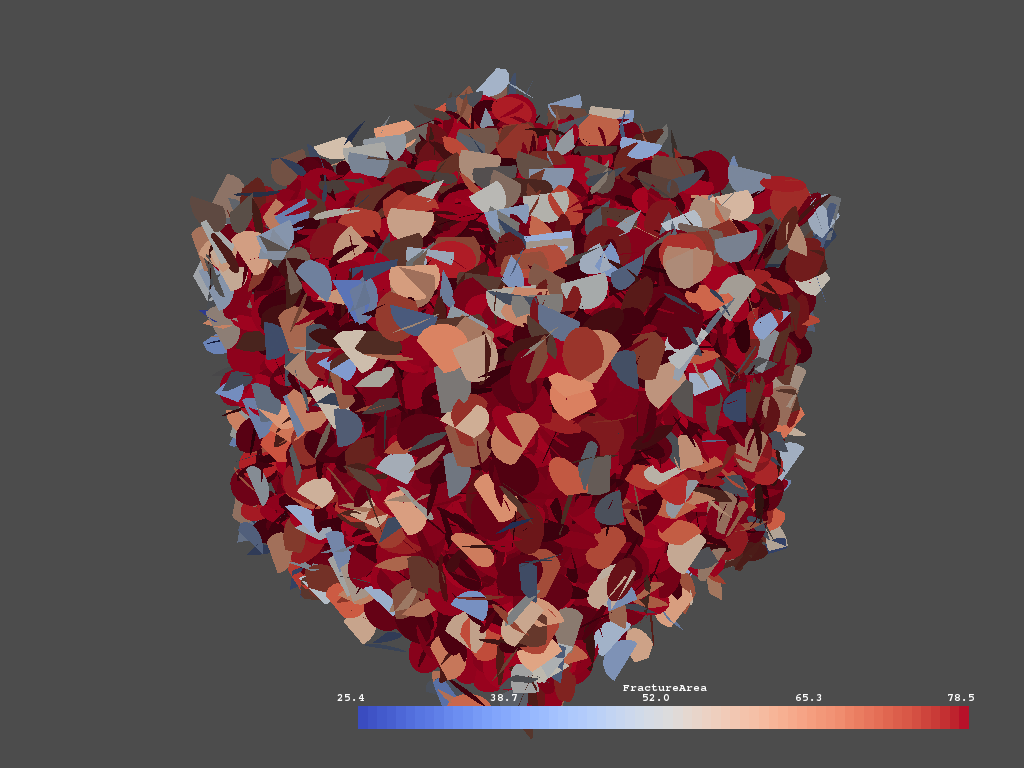

In [4]:
dfn_io.write_DFN_file(fnet,'dfn.vtp')
visu = pv.read('dfn.vtp')
p = pv.Plotter(notebook=True)
p.add_mesh(visu, scalars='FractureArea', cmap='coolwarm', lighting=True, show_scalar_bar=True)
p.show(auto_close=False, use_panel=False)

## Example 2: Power-law size distribution

We generate here a Discrete Fracture Network in a cubic system of size $L=100$, following a power-law size distribution $n(l)=\alpha.l^{-a}$ so that: 
* Exponent $a=3$
* Minimum and maximum fracture sizes are $l_{min}=1$ and $l_{max}=100$
* Orientations are drawn from a Fisher distribution of parameters $dip=45$, $dipdir=90$, and a dispersion factor $\kappa=15$
* Fracture intensity $p_{32}=0.25$

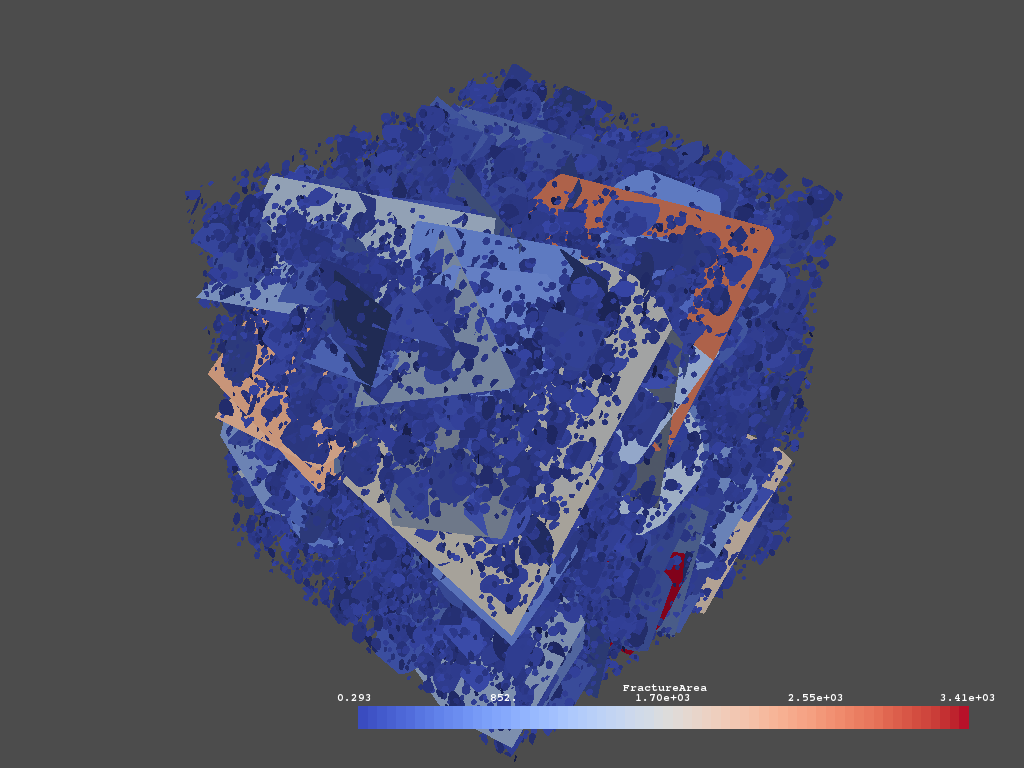

In [5]:
system = dfn.System()
system.buildParallelepiped([0, 0, 0], 100.)
fnet = dfn.DFN(system)

generator = dfn_gen.PoissonGenerator(fnet,1001) #seed=1001
generator.setSizesPowerlaw(3.,1,100)
generator.setPositionsUniform()
generator.setOrientationsFisher(45,90,15)
generator.setStopDensity(0.25)
generator.generate()
fnet.computeIntersections()

dfn_io.write_DFN_file(fnet,'dfn.vtp')
visu = pv.read('dfn.vtp')
p = pv.Plotter(notebook=True)
p.add_mesh(visu, scalars='FractureArea', cmap='coolwarm', lighting=True, show_scalar_bar=True)
p.show(auto_close=False, use_panel=False)